<a href="https://colab.research.google.com/github/DamiSoh/Posting_Materials/blob/main/Jun.2021.Titanic_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [24]:
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/train.csv')
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/test.csv')

In [25]:
train['Initial'] = 0
for i in train:
  train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [26]:
train['Initial'].replace(['Mlle','Mme','Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [27]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [28]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

In [55]:
test['Initial'] = 0
for i in test:
  test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [56]:
test['Initial'].replace(['Mlle','Mme','Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [57]:
test.groupby('Initial')['Age'].mean()

Initial
Dona      39.000000
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64

In [58]:
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age']=33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=38
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=7
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=21
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=43

In [59]:
test.Age.isnull().any()

False

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train, val = train_test_split(train, random_state=2)

In [32]:
target = 'Survived'
y_train = train[target]
y_train.value_counts(normalize = True)

0    0.625749
1    0.374251
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


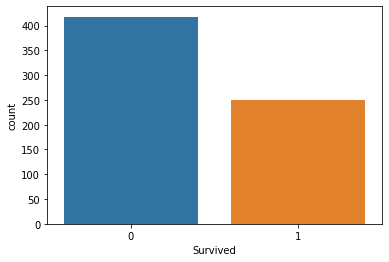

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y_train);

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logistics = LogisticRegression()

In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S,Miss
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S,Mr
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S,Mr
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S,Mrs
126,127,0,3,"McMahon, Mr. Martin",male,33.0,0,0,370372,7.7500,NaN,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss
584,585,0,3,"Paulner, Mr. Uscher",male,33.0,0,0,3411,8.7125,NaN,C,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
527,528,0,1,"Farthing, Mr. John",male,33.0,0,0,PC 17483,221.7792,C95,S,Mr


In [41]:
#! pip install category_encoders
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [45]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

In [46]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C,Embarked_nan
199,2,1,0,24.0,0,0,13.000,1,0,0,0
129,3,0,1,45.0,0,0,6.975,1,0,0,0
90,3,0,1,29.0,0,0,8.050,1,0,0,0
230,1,1,0,35.0,1,0,83.475,1,0,0,0
126,3,0,1,33.0,0,0,7.750,0,1,0,0


In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

In [50]:
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.7982062780269058

In [53]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients

Pclass         -0.928572
Sex_female      0.653280
Sex_male       -0.653280
Age            -0.592708
SibSp          -0.428829
Parch          -0.014156
Fare            0.073094
Embarked_S     -0.088801
Embarked_Q     -0.021005
Embarked_C      0.091120
Embarked_nan    0.190733
dtype: float64

In [62]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
Initial        False
dtype: bool

In [65]:
imputer = SimpleImputer(strategy='mean')
X_test = test[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.fit_transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

y_pred_test = model.predict(X_test_scaled)

In [67]:
submission = test[['PassengerId']].copy()
submission['Survived'] = y_pred_test
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
submission.to_csv('submission_titanic.csv', index=False)